In [1]:
from loader import MetaCorpraInfo, CorpusInfo, PieceInfo

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
metacorpora_path = 'petit_dcml_corpus/'
metacorpora = MetaCorpraInfo(metacorpora_path)

### 1. Chronological distribution of pieces

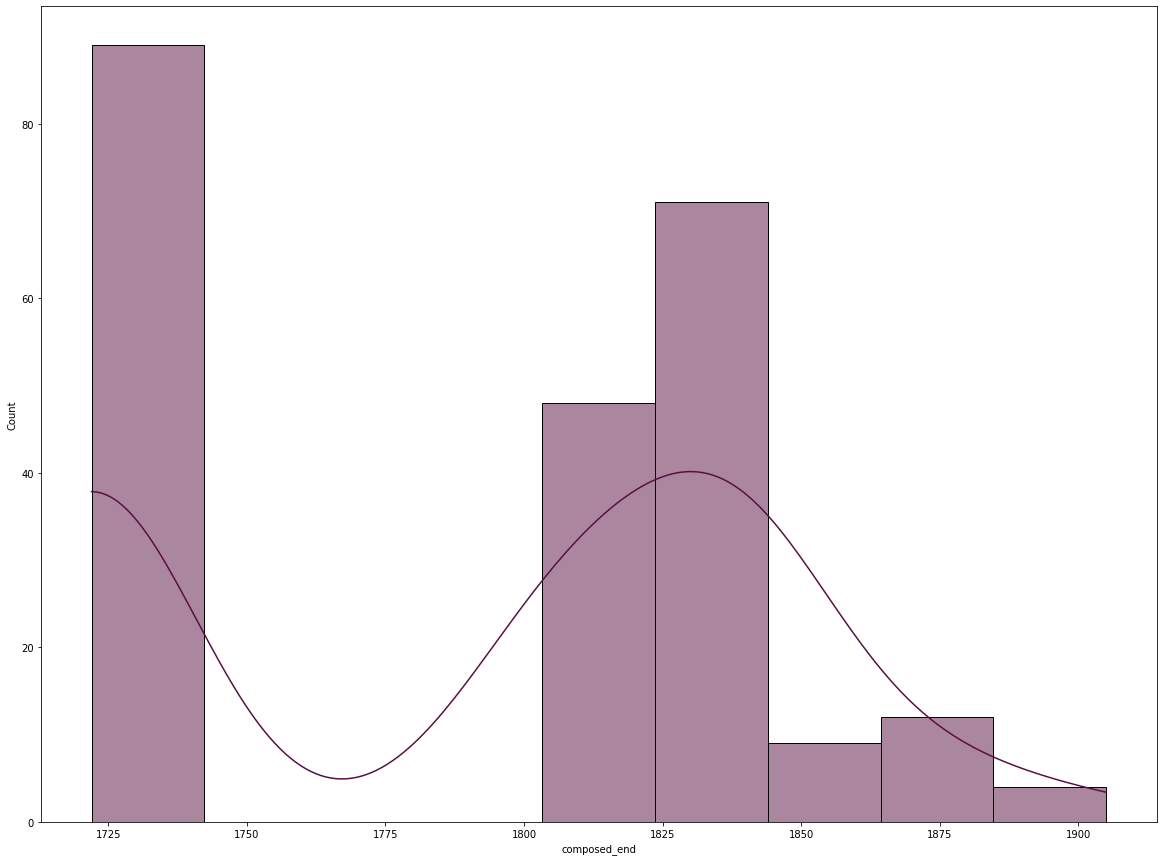

In [3]:
composed_years = metacorpora.get_corpora_concat_metadata_df(selected_keys=['corpus', 'fnames', 'composed_end'])


f, ax = plt.subplots(figsize=(20, 15))
# sns.histplot(data=composed_years, x='composed_end', stat='count', color='#4B0082', kde=True)
sns.histplot(data=composed_years, x='composed_end', stat='count', color='#580F41', kde=True)
plt.show()

### 2. Modulations count within a piece

In [4]:
# prepare the dataframe for plotting: [corpus, fname, composed_end, localkey_label, num_modulation]

modulation_df_list=[]
for idx, val in enumerate(metacorpora.corpus_name_list):
    corpus = CorpusInfo(corpus_path=metacorpora_path+val+'/')
    corpus_modulation_df = corpus.get_modulation_data_df()
    modulation_df_list.append(corpus_modulation_df)

modulation_data_df= pd.concat(modulation_df_list, ignore_index=True)


modulation_data_df

,corpus,fname,composed_end,localkey_labels,num_modulations
0,bach_en_fr_suites,BWV806_01_Prélude,1722,I,1
1,bach_en_fr_suites,BWV806_02_Allemande,1722,I,1
2,bach_en_fr_suites,BWV806_03_Courante_I,1722,I,1
3,bach_en_fr_suites,BWV806_04_Courante_II,1722,I,1
4,bach_en_fr_suites,BWV806_05_Double_I,1722,I,1
...,...,...,...,...,...
228,tchaikovsky_seasons,op37a08,1876,i-V-i-iv-iv/iv-bII-iv-VI-i-III-i-III-V-i-III-V...,37
229,tchaikovsky_seasons,op37a09,1876,I-ii-iii-#iv-V-I-vi-#iv-bvi-vi-bVII-I-II-III-I...,20
230,tchaikovsky_seasons,op37a10,1876,i-III-i-III-i-iv-III-i-iv-III-i-III-i,13
231,tchaikovsky_seasons,op37a11,1876,I-iii-I-bIII-iv-bIII-v-III/v-bIII-iv-bIII-v-I-...,15


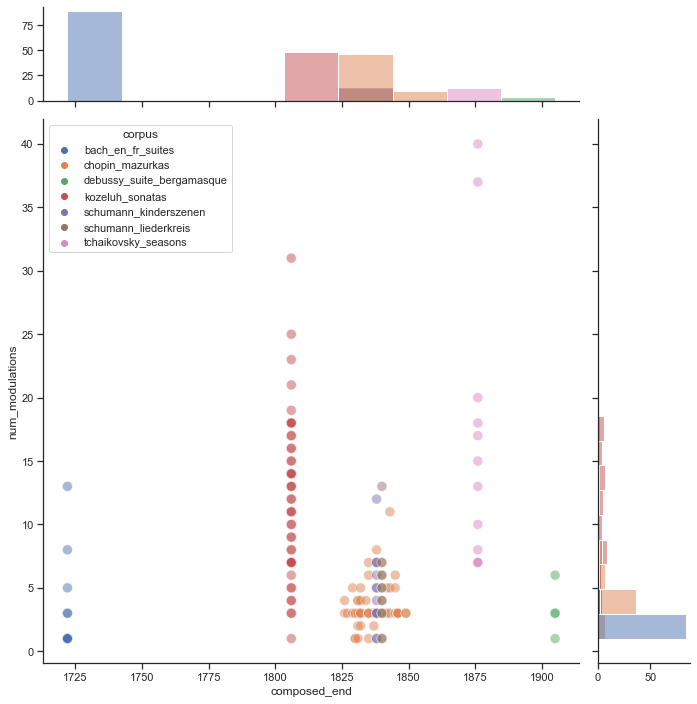

<Figure size 1080x1080 with 0 Axes>

In [34]:
# plots

sns.set_theme(style="ticks")

g=sns.JointGrid(data=modulation_data_df, x='composed_end', y='num_modulations',
                height = 10,
                hue='corpus', marginal_ticks=True)
g.plot_joint(sns.scatterplot, s=100, alpha=0.5)
g.plot_marginals(sns.histplot)
plt.figure(figsize=(15, 15))
plt.show()

### 3. Closer look at Chopin corpus

In [35]:
chopin_corpus= CorpusInfo(corpus_path='petit_dcml_corpus/chopin_mazurkas/')
